# Twitter Analysis

For the twitter sentiment analysis model, we use a dataset of tweets labelled either positive or negative.
The dataset for training the model is from "Sentiment140", a dataset from Stanford University.
More info on the dataset can be found from the below link.
http://help.sentiment140.com/for-students/<br><br>
The dataset can be downloaded from the below link.<br>
http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip

Attribution: https://medium.com/@rickykim78/another-twitter-sentiment-analysis-bb5b01ebad90

By looking at the description of the dataset from the link, the information on each field can be found.

0 - the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)<br>
1 - the id of the tweet (2087)<br>
2 - the date of the tweet (Sat May 16 23:58:44 UTC 2009)<br>
3 - the query (lyx). If there is no query, then this value is NO_QUERY.<br>
4 - the user that tweeted (robotickilldozr)<br>
5 - the text of the tweet (Lyx is cool)

## First look at the data

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd  
style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'

First, columns names have been assigned to each column.

In [3]:
cols = ['sentiment','id','date','query_string','user','text']

In [4]:
df = pd.read_csv("training.1600000.processed.noemoticon.csv", 
                 header=None, names=cols, encoding='latin-1')

In [5]:
df.head()

,sentiment,id,date,query_string,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
sentiment       1600000 non-null int64
id              1600000 non-null int64
date            1600000 non-null object
query_string    1600000 non-null object
user            1600000 non-null object
text            1600000 non-null object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [7]:
df.sentiment.value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

Dataset has 1.6million entries, with no null entries, and importantly for the "sentiment" column, even though the dataset description mentioned neutral class, the training set has no neutral class. 50% of the data is with negative label, and another 50% with positive label.
We can see there's no skewness on the class division.

In [8]:
df.query_string.value_counts()

NO_QUERY    1600000
Name: query_string, dtype: int64

In [9]:
df.drop(['id','date','query_string','user'],axis=1,inplace=True)

In [10]:
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


Drop the following columns that we don't need for the specific purpose of sentiment analysis.<br><br>
"id" column is unique ID for each tweet<br>
"date" column is for date info for the tweet<br>
"query_string" column indicates whether the tweet has been collected with any particular query key word,
but for this column, 100% of the entries are with value "NO_QUERY"<br>
"user" column is the twitter handle name for the user who tweeted<br><br>


In [11]:
df[df.sentiment == 0].head(10)

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
5,0,@Kwesidei not the whole crew
6,0,Need a hug
7,0,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,@Tatiana_K nope they didn't have it
9,0,@twittera que me muera ?


In [12]:
df[df.sentiment == 4].head(10)

,sentiment,text
800000,4,I LOVE @Health4UandPets u guys r the best!!
800001,4,im meeting up with one of my besties tonight! ...
800002,4,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,Being sick can be really cheap when it hurts t...
800004,4,@LovesBrooklyn2 he has that effect on everyone
800005,4,@ProductOfFear You can tell him that I just bu...
800006,4,@r_keith_hill Thans for your response. Ihad al...
800007,4,"@KeepinUpWKris I am so jealous, hope you had a..."
800008,4,"@tommcfly ah, congrats mr fletcher for finally..."
800009,4,@e4VoIP I RESPONDED Stupid cat is helping me ...


By looking at some entries for each class, it seems like that all the negative class is from 0~799999th index,
and the positive class entries start from 800000 to the end of the dataset.

In [13]:
df[df.sentiment == 0].index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            799990, 799991, 799992, 799993, 799994, 799995, 799996, 799997,
            799998, 799999],
           dtype='int64', length=800000)

In [14]:
df[df.sentiment == 4].index

Int64Index([ 800000,  800001,  800002,  800003,  800004,  800005,  800006,
             800007,  800008,  800009,
            ...
            1599990, 1599991, 1599992, 1599993, 1599994, 1599995, 1599996,
            1599997, 1599998, 1599999],
           dtype='int64', length=800000)

In order for the computation, map the class value of 4(positive) to 1.

In [15]:
df['sentiment'] = df['sentiment'].map({0: 0, 4: 1})

In [16]:
df.sentiment.value_counts()

1    800000
0    800000
Name: sentiment, dtype: int64

# Data Preparation

As a way of sanity check, let's look at the length of the string in text column in each entry.

In [18]:
df['pre_clean_len'] = [len(t) for t in df.text]

## Data Dictionary - first draft

Below is the first draft of the data dictionary for the dataset.

In [20]:
from pprint import pprint
data_dict = {
    'sentiment':{
        'type':df.sentiment.dtype,
        'description':'sentiment class - 0:negative, 1:positive'
    },
    'text':{
        'type':df.text.dtype,
        'description':'tweet text'
    },
    'pre_clean_len':{
        'type':df.pre_clean_len.dtype,
        'description':'Length of the tweet before cleaning'
    },
    'dataset_shape':df.shape
}

pprint(data_dict)

{'dataset_shape': (1600000, 3),
 'pre_clean_len': {'description': 'Length of the tweet before cleaning',
                   'type': dtype('int64')},
 'sentiment': {'description': 'sentiment class - 0:negative, 1:positive',
               'type': dtype('int64')},
 'text': {'description': 'tweet text', 'type': dtype('O')}}


Plot pre_clean_len with box plot to see the overall distribution of length of strings in each entry.

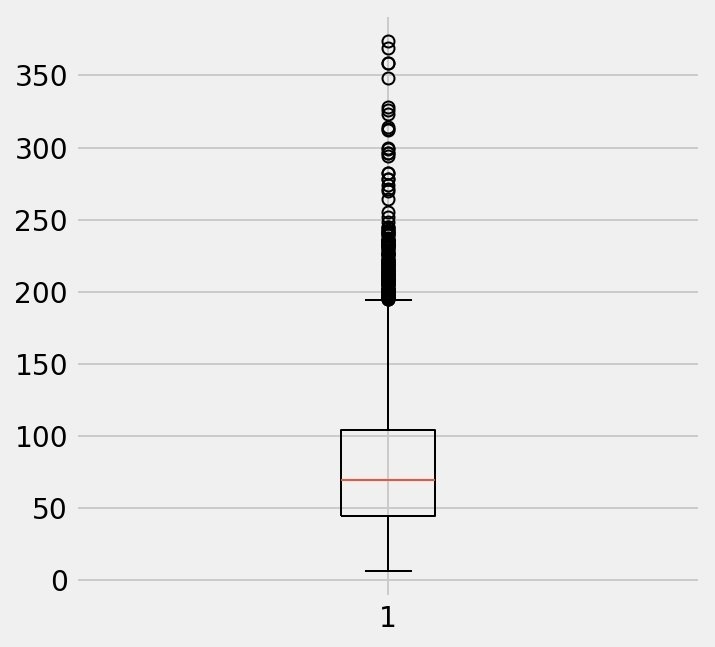

In [21]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.pre_clean_len)
plt.show()

This looks a bit strange, since the twitter's character limit is 140. But from the above box plot, some of the tweets are way more than 140 chracters long.

In [22]:
df[df.pre_clean_len > 140].head(10)

,sentiment,text,pre_clean_len
213,0,Awwh babs... you look so sad underneith that s...,142
226,0,Tuesdayï¿½ll start with reflection ï¿½n then a...,141
279,0,Whinging. My client&amp;boss don't understand ...,145
343,0,@TheLeagueSF Not Fun &amp; Furious? The new ma...,145
400,0,#3 woke up and was having an accident - &quot;...,144
464,0,"My bathtub drain is fired: it haz 1 job 2 do, ...",146
492,0,"pears &amp; Brie, bottle of Cabernet, and &quo...",150
747,0,Have an invite for &quot;Healthy Dining&quot; ...,141
957,0,Damnit I was really digging this season of Rea...,141
1064,0,Why do I keep looking...I know that what I rea...,141


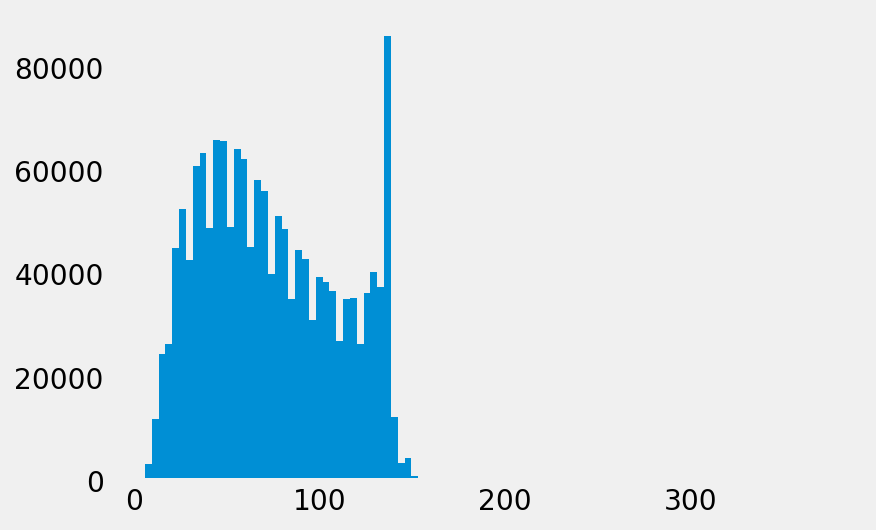

In [23]:
#Histogram of tweet lengths
hist(df.pre_clean_len,100)
grid()

We see pretty clearly the huge agglomeration of tweets around 140 characters. 

## Data Preparation 1: HTML decoding

It looks like HTML encoding has not been converted to text, and ended up in text field as '&amp','&quot',etc.<br>
Decoding HTML to general text will be the first step of data preparation.
Use BeautifulSoup for this.

In [24]:
df.text[279]

"Whinging. My client&amp;boss don't understand English well. Rewrote some text unreadable. It's written by v. good writer&amp;reviewed correctly. "

In [25]:
from bs4 import BeautifulSoup
example1 = BeautifulSoup(df.text[279], 'lxml')
print(example1.get_text())

Whinging. My client&boss don't understand English well. Rewrote some text unreadable. It's written by v. good writer&reviewed correctly. 


## Data Preparation 2: @mention

The second part of the preparation is dealing with @mention.<br>
Even though @mention carries a certain information (which another user that the tweet mentioned),
this information doesn't add value to build sentiment analysis model.

In [26]:
df.text[343]

'@TheLeagueSF Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down '

In [27]:
import re
re.sub(r'@[A-Za-z0-9]+','',df.text[343])

' Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down '

## Data Preparation 3: URL links

The third part of the cleaning is dealing with URL links, same with @mention,
even though it carries some information, for sentiment analysis purpose,
this can be ignored.

In [28]:
df.text[0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [29]:
re.sub('https?://[A-Za-z0-9./]+','',df.text[0])

"@switchfoot  - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

## Data Preparation 4: hashtag / numbers

Sometimes the text used with hashtag can provide useful information about the tweet. It might be a bit risky to get rid of all the text together with the hashtag.<br>
So I decided to leave the text intact and just remove the '#'. I will do this in the process of cleaning all the non letter characters including numbers.

In [32]:
df.text[175]

"@machineplay I'm so sorry you're having to go through this. Again.  #therapyfail"

In [33]:
re.sub("[^a-zA-Z]", " ", df.text[175])

' machineplay I m so sorry you re having to go through this  Again    therapyfail'

# Defining data cleaning function

With above data cleaning tasks, first define the data cleaning function, and then it will be applied to the whole dataset. Tokenization, stemming/lemmatization, stop words will be dealt with at a later stage when creating matrix with either count vectorizer or Tfidf vectorizer.

In [34]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

In [35]:
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [36]:
testing = df.text[:100]

In [37]:
test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))

In [38]:
test_result

['awww that s a bummer you shoulda got david carr of third day to do it d',
 'is upset that he can t update his facebook by texting it and might cry as a result school today also blah',
 'i dived many times for the ball managed to save the rest go out of bounds',
 'my whole body feels itchy and like its on fire',
 'no it s not behaving at all i m mad why am i here because i can t see you all over there',
 'not the whole crew',
 'need a hug',
 'hey long time no see yes rains a bit only a bit lol i m fine thanks how s you',
 'k nope they didn t have it',
 'que me muera',
 'spring break in plain city it s snowing',
 'i just re pierced my ears',
 'i couldn t bear to watch it and i thought the ua loss was embarrassing',
 'it it counts idk why i did either you never talk to me anymore',
 'i would ve been the first but i didn t have a gun not really though zac snyder s just a doucheclown',
 'i wish i got to watch it with you i miss you and how was the premiere',
 'hollis death scene will hurt

In [39]:
nums = [0,400000,800000,1200000,1600000]

In [40]:
%%time
print("Cleaning and parsing the tweets...\n")
clean_tweet_texts = []
for i in range(nums[0],nums[1]):
    if( (i+1)%10000 == 0 ):
        print("Tweets %d of %d has been processed" % ( i+1, nums[1] ) )                                                                   
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))

Cleaning and parsing the tweets...

Tweets 10000 of 400000 has been processed
Tweets 20000 of 400000 has been processed
Tweets 30000 of 400000 has been processed
Tweets 40000 of 400000 has been processed
Tweets 50000 of 400000 has been processed
Tweets 60000 of 400000 has been processed
Tweets 70000 of 400000 has been processed
Tweets 80000 of 400000 has been processed
Tweets 90000 of 400000 has been processed
Tweets 100000 of 400000 has been processed
Tweets 110000 of 400000 has been processed
Tweets 120000 of 400000 has been processed
Tweets 130000 of 400000 has been processed
Tweets 140000 of 400000 has been processed
Tweets 150000 of 400000 has been processed
Tweets 160000 of 400000 has been processed
Tweets 170000 of 400000 has been processed
Tweets 180000 of 400000 has been processed
Tweets 190000 of 400000 has been processed
Tweets 200000 of 400000 has been processed
Tweets 210000 of 400000 has been processed
Tweets 220000 of 400000 has been processed
Tweets 230000 of 400000 has

In [41]:
len(clean_tweet_texts)

400000

In [42]:
%%time
print("Cleaning and parsing the tweets...\n")
for i in range(nums[1],nums[2]):
    if( (i+1)%10000 == 0 ):
        print("Tweets %d of %d has been processed" % ( i+1, nums[2] ))                                                                    
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))

Cleaning and parsing the tweets...

Tweets 410000 of 800000 has been processed
Tweets 420000 of 800000 has been processed
Tweets 430000 of 800000 has been processed
Tweets 440000 of 800000 has been processed
Tweets 450000 of 800000 has been processed
Tweets 460000 of 800000 has been processed
Tweets 470000 of 800000 has been processed
Tweets 480000 of 800000 has been processed
Tweets 490000 of 800000 has been processed
Tweets 500000 of 800000 has been processed
Tweets 510000 of 800000 has been processed
Tweets 520000 of 800000 has been processed
Tweets 530000 of 800000 has been processed
Tweets 540000 of 800000 has been processed
Tweets 550000 of 800000 has been processed
Tweets 560000 of 800000 has been processed
Tweets 570000 of 800000 has been processed
Tweets 580000 of 800000 has been processed
Tweets 590000 of 800000 has been processed
Tweets 600000 of 800000 has been processed
Tweets 610000 of 800000 has been processed
Tweets 620000 of 800000 has been processed
Tweets 630000 of 8

In [43]:
len(clean_tweet_texts)

800000

In [44]:
%%time
print("Cleaning and parsing the tweets...\n")
for i in range(nums[2],nums[3]):
    if( (i+1)%10000 == 0 ):
        print("Tweets %d of %d has been processed" % ( i+1, nums[3] ))                                                                    
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))

Cleaning and parsing the tweets...

Tweets 810000 of 1200000 has been processed
Tweets 820000 of 1200000 has been processed
Tweets 830000 of 1200000 has been processed
Tweets 840000 of 1200000 has been processed
Tweets 850000 of 1200000 has been processed
Tweets 860000 of 1200000 has been processed
Tweets 870000 of 1200000 has been processed
Tweets 880000 of 1200000 has been processed
Tweets 890000 of 1200000 has been processed
Tweets 900000 of 1200000 has been processed
Tweets 910000 of 1200000 has been processed
Tweets 920000 of 1200000 has been processed
Tweets 930000 of 1200000 has been processed
Tweets 940000 of 1200000 has been processed
Tweets 950000 of 1200000 has been processed
Tweets 960000 of 1200000 has been processed
Tweets 970000 of 1200000 has been processed
Tweets 980000 of 1200000 has been processed
Tweets 990000 of 1200000 has been processed
Tweets 1000000 of 1200000 has been processed
Tweets 1010000 of 1200000 has been processed
Tweets 1020000 of 1200000 has been pro

In [45]:
len(clean_tweet_texts)

1200000

In [46]:
%%time
print("Cleaning and parsing the tweets...\n")
for i in range(nums[3],nums[4]):
    if( (i+1)%10000 == 0 ):
        print("Tweets %d of %d has been processed" % ( i+1, nums[4] ))                                                                    
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))

Cleaning and parsing the tweets...

Tweets 1210000 of 1600000 has been processed
Tweets 1220000 of 1600000 has been processed
Tweets 1230000 of 1600000 has been processed
Tweets 1240000 of 1600000 has been processed
Tweets 1250000 of 1600000 has been processed
Tweets 1260000 of 1600000 has been processed
Tweets 1270000 of 1600000 has been processed
Tweets 1280000 of 1600000 has been processed
Tweets 1290000 of 1600000 has been processed
Tweets 1300000 of 1600000 has been processed
Tweets 1310000 of 1600000 has been processed
Tweets 1320000 of 1600000 has been processed
Tweets 1330000 of 1600000 has been processed
Tweets 1340000 of 1600000 has been processed
Tweets 1350000 of 1600000 has been processed
Tweets 1360000 of 1600000 has been processed
Tweets 1370000 of 1600000 has been processed
Tweets 1380000 of 1600000 has been processed
Tweets 1390000 of 1600000 has been processed
Tweets 1400000 of 1600000 has been processed
Tweets 1410000 of 1600000 has been processed
Tweets 1420000 of 1

In [47]:
len(clean_tweet_texts)

1600000

## Saving cleaned data as csv

In [48]:
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df['target'] = df.sentiment
clean_df.head()

,text,target
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


In [49]:
clean_df.to_csv('clean_tweet.csv',encoding='utf-8')

In [50]:
csv = 'clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

/home/srdas/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:395: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,text,target
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


In [51]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
text      1596753 non-null object
target    1600000 non-null int64
dtypes: int64(1), object(1)
memory usage: 36.6+ MB


# Twitter API

We explore using the Twitter API here. 

In [52]:
import tweepy
#import hidden
import sqlite3
from langdetect import detect

We can set up keys and tokens at: https://apps.twitter.com/

In [53]:
consumer_key = 'tRby6pJGgzaN1Y9OOFU8nOzCV'
consumer_secret = 'aL7BAVZ4UwBQ1HyffIxsCG2da8BdJTcFD3WziDe3mePFFLoA2u'
access_token = '18666236-DmDE1wwbpvPbDcw9kwt9yThGeyYhjfpVVywrHuhOQ'
access_token_secret = 'cttbpxpTtqJn7wrCP36I59omNI5GQHXXgV41sKwUgc'

In [54]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In order to retrieve tweets from specific location, I need place_id.

In [55]:
places = api.geo_search(query="London", granularity="city")

place_id_L = places[0].id
print('London id is: ',place_id_L)

London id is:  5de8cffc145c486b


I tried if this place_id works OK.

In [60]:
maxitems = 10
print("London tweets retrieve testing")
print('----------------------------------')
for tweet in tweepy.Cursor(api.search, q="place:%s" % place_id_L).items(maxitems):
    print(tweet.text)

London tweets retrieve testing
----------------------------------
At last the first step in sensible scrutiny of Brexit.
@BTCDJS @parabolictrav Haha 😂 Ok. Thanks! Was hoping for a lower dip before new futures opening. Guess not.
World War M has officially been declared by @IanFlitcroft! Watch out Myopia - we’re coming for you! https://t.co/5aoWjEchmz
@NTtweeting @mancunianmedic I resisted temptation today but sense a binge coming on Friday
Focus on Self Growth, Business Growth &amp; Booty Growth! 🍑 Happy Hump Day 🖤🔪 New shot by Remedy Images wearing… https://t.co/WnOAT892jY
Brexit Bill amendment vote 309 Aye to 304 No. @theresa_may defeated by 4 votes
Finally, Parliament has taken back control ✊🏻 https://t.co/SAKCEaSBUY
Boom! https://t.co/FHcKUun5Lj
Ten minutes til our first preview- this is it everyone!! It’s going to be wonderful @TopHatGatehouse xx https://t.co/OUs1QywPnZ
This is the first year that PwC has recognised the #VR market as a major player to watch in entertainment - so g

In order to retrieve tweets, and gather the results as data use SQL to store the data.

In [62]:
conn = sqlite3.connect('twitter_testing.sqlite')
cur = conn.cursor()
cur.executescript('''

CREATE TABLE Tweets_London (
    id     INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
    user_id TEXT,
    user_name TEXT,
    user_timezone TEXT,
    user_language TEXT,
    detected_language TEXT,
    tweet_text  TEXT,
    tweet_created TEXT
)
''')

In [63]:
for tweet in tweepy.Cursor(api.search, q="place:%s" % place_id_L).items(maxitems):
    detected = detect(tweet.text)
    cur.execute('''INSERT OR IGNORE INTO Tweets_London (
        user_id, user_name, user_timezone, user_language, detected_language, tweet_text, tweet_created
        ) 
    VALUES ( ?,?,?,?,?,?,? )''', (tweet.user.id,tweet.user.screen_name,tweet.user.time_zone,tweet.user.lang,detected,tweet.text,tweet.created_at))
    conn.commit()

In [64]:
from_sql = pd.read_sql_query("SELECT * FROM Tweets_London;", conn)

In [65]:
from_sql

,id,user_id,user_name,user_timezone,user_language,detected_language,tweet_text,tweet_created
0,1,107390621,lewismalka,London,en,en,Boom!! What do you notice about this fine coll...,2017-12-13 19:24:40
1,2,619241579,jmullinjourno,None,en,en,Seen a few of these about Coleman. Clearly a p...,2017-12-13 19:24:13
2,3,39012903,gushingtide,London,en,en,At last the first step in sensible scrutiny of...,2017-12-13 19:21:59
3,4,15899229,laurenmichelles,Hawaii,en,en,@BTCDJS @parabolictrav Haha 😂 Ok. Thanks! Was ...,2017-12-13 19:21:51
4,5,126001233,_BCLA,London,en,en,World War M has officially been declared by @I...,2017-12-13 19:21:44
5,6,1099080674,neilgchurchill,Amsterdam,en,en,@NTtweeting @mancunianmedic I resisted temptat...,2017-12-13 19:21:21
6,7,2341680564,Ria_Fend,London,en,en,"Focus on Self Growth, Business Growth &amp; Bo...",2017-12-13 19:20:51
7,8,158872871,DJDIRTYJONES,London,en,en,Brexit Bill amendment vote 309 Aye to 304 No. ...,2017-12-13 19:20:00
8,9,18361789,KatieCurtis,Hawaii,en,en,"Finally, Parliament has taken back control ✊🏻 ...",2017-12-13 19:18:42
9,10,20842606,ellacalnan,London,en,so,Boom! https://t.co/FHcKUun5Lj,2017-12-13 19:18:34


## Get all tweets from a given user

In [129]:
id = 'realDonaldtrump'
new_tweets = api.user_timeline(screen_name = id,count=20)
print(len(new_tweets))
print(new_tweets)

20
[Status(_api=<tweepy.api.API object at 0x7fdba904bba8>, _json={'created_at': 'Wed Dec 13 14:45:48 +0000 2017', 'id': 940955920967880704, 'id_str': '940955920967880704', 'text': 'If last night’s election proved anything, it proved that we need to put up GREAT Republican candidates to increase… https://t.co/H4IWrlwWwl', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/H4IWrlwWwl', 'expanded_url': 'https://twitter.com/i/web/status/940955920967880704', 'display_url': 'twitter.com/i/web/status/9…', 'indices': [116, 139]}]}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 25073877, 'id_str': '25073877', 'name': 'Donald J. Trump', 'screen_name': 'realDonaldTrump', 'location': 'Washington, DC', 'descriptio

In [130]:
import json
tweets = []
for tw in new_tweets:
    tweets.append(tw.text)
#tweets = pd.DataFrame(tweets)
print(tweets)

['If last night’s election proved anything, it proved that we need to put up GREAT Republican candidates to increase… https://t.co/H4IWrlwWwl', 'Wow, more than 90% of Fake News Media coverage of me is negative, with numerous forced retractions of untrue storie… https://t.co/nyZJca6Hnm', 'The reason I originally endorsed Luther Strange (and his numbers went up mightily), is that I said Roy Moore will n… https://t.co/DcgJPmLTXy', 'Congratulations to Doug Jones on a hard fought victory. The write-in votes played a very big factor, but a win is a… https://t.co/QLFQ88UaLM', 'Wishing all of those celebrating #Hanukkah around the world a happy and healthy eight nights in the company of thos… https://t.co/ZTNEFIV6cB', 'Consumer Confidence is at an All-Time High, along with a Record High Stock Market. Unemployment is at a 17 year low… https://t.co/zeDQbntlYG', 'The people of Alabama will do the right thing. Doug Jones is Pro-Abortion, weak on Crime, Military and Illegal Immi… https://t.co/yv1Ib

In [131]:
#Clean up the tweets: remove all strings beginning with @
import re
for j in range(len(tweets)):
    tweets[j] = tweet_cleaner(tweets[j])
print(tweets)

['if last night s election proved anything it proved that we need to put up great republican candidates to increase', 'wow more than of fake news media coverage of me is negative with numerous forced retractions of untrue storie', 'the reason i originally endorsed luther strange and his numbers went up mightily is that i said roy moore will n', 'congratulations to doug jones on a hard fought victory the write in votes played a very big factor but a win is a', 'wishing all of those celebrating hanukkah around the world a happy and healthy eight nights in the company of thos', 'consumer confidence is at an all time high along with a record high stock market unemployment is at a year low', 'the people of alabama will do the right thing doug jones is pro abortion weak on crime military and illegal immi', 'lightweight senator kirsten gillibrand a total flunky for chuck schumer and someone who would come to my office b', 'despite thousands of hours wasted and many millions of dollars spent t

In [132]:
#Cleaner display
df_tweets = pd.DataFrame(tweets)
df_tweets

,0
0,if last night s election proved anything it pr...
1,wow more than of fake news media coverage of m...
2,the reason i originally endorsed luther strang...
3,congratulations to doug jones on a hard fought...
4,wishing all of those celebrating hanukkah arou...
5,consumer confidence is at an all time high alo...
6,the people of alabama will do the right thing ...
7,lightweight senator kirsten gillibrand a total...
8,despite thousands of hours wasted and many mil...
9,another false story this time in the failing t...


## Using the NLTK package to conduct sentiment analysis without a dictionary

In [142]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
sid = SentimentIntensityAnalyzer()
for tw in tweets:
    print(tw)
    print(sid.polarity_scores(tw))

if last night s election proved anything it proved that we need to put up great republican candidates to increase
{'neg': 0.0, 'neu': 0.726, 'pos': 0.274, 'compound': 0.7506}
wow more than of fake news media coverage of me is negative with numerous forced retractions of untrue storie
{'neg': 0.349, 'neu': 0.52, 'pos': 0.132, 'compound': -0.7402}
the reason i originally endorsed luther strange and his numbers went up mightily is that i said roy moore will n
{'neg': 0.091, 'neu': 0.808, 'pos': 0.101, 'compound': 0.0516}
congratulations to doug jones on a hard fought victory the write in votes played a very big factor but a win is a
{'neg': 0.109, 'neu': 0.534, 'pos': 0.357, 'compound': 0.8176}
wishing all of those celebrating hanukkah around the world a happy and healthy eight nights in the company of thos
{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.9001}
consumer confidence is at an all time high along with a record high stock market unemployment is at a year low
{'neg': 0.20

In [140]:
#Run this in case we need to download dictionaries from NLTK
#nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

## Extracting tweets with a hashtag

In [148]:
htag = '#METOO'
tweets = []
for tw in tweepy.Cursor(api.search,q=htag).items(10):
    tweets.append(tweet_cleaner(tw.text))
for tw in tweets:
    print(tw)
    print(sid.polarity_scores(tw))

rt ten years ago created the metoo movement to tell young women of color who had survived sexual assault tha
{'neg': 0.146, 'neu': 0.651, 'pos': 0.203, 'compound': 0.128}
for republicans who are dismayed at the direction of the party counting on a new generation to ri
{'neg': 0.141, 'neu': 0.728, 'pos': 0.131, 'compound': -0.0516}
rt dems trump sexually harassed stacia we believe her and support her metoo
{'neg': 0.203, 'neu': 0.64, 'pos': 0.157, 'compound': -0.2023}
rt ten years ago created the metoo movement to tell young women of color who had survived sexual assault tha
{'neg': 0.146, 'neu': 0.651, 'pos': 0.203, 'compound': 0.128}
rt thank you for your courage to speak out and share your story metoo
{'neg': 0.0, 'neu': 0.582, 'pos': 0.418, 'compound': 0.7845}
rt i just found this note attached to a secret camera in my bathroom how can this monster be a senator metoo alabamase
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rt the dems are weaponizing the metoo movement to tak